Image resized to: (800, 600)
Output image saved to /content/detected_output.jpg


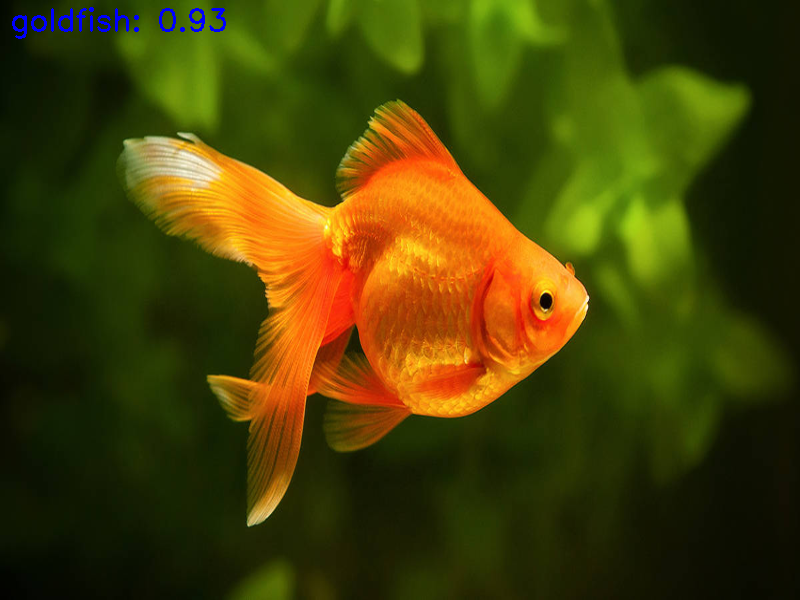

In [2]:
import torch
import torchvision
from torchvision import transforms
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained DenseNet model for image classification
model = torchvision.models.densenet121(pretrained=True)
model.eval()

# Transformations for input image preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load ImageNet classes for classification (DenseNet is trained on ImageNet)
LABELS = {0: 'tench', 1: 'goldfish', 2: 'great white shark', 3: 'tiger shark', 4: 'hammerhead',
          5: 'electric ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling',
          # Add other class labels (ImageNet has 1000 categories)
          }

def classify_image(image_path, resize_dim=None, save_output=False, output_path="output.jpg"):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    # Resize the image if dimensions are provided
    if resize_dim is not None:
        image = cv2.resize(image, resize_dim)
        print(f"Image resized to: {resize_dim}")

    original_image = image.copy()

    # Convert image to tensor and apply transformations
    image_tensor = transform(image)

    # Add batch dimension
    image_tensor = image_tensor.unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    # Get the predicted class
    predicted_class = torch.argmax(predictions, dim=1).item()
    confidence = torch.nn.functional.softmax(predictions, dim=1)[0][predicted_class].item()

    # Add label to the image
    label = LABELS.get(predicted_class, 'Unknown')
    cv2.putText(original_image, f"{label}: {confidence:.2f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Save the output image if required
    if save_output:
        cv2.imwrite(output_path, original_image)
        print(f"Output image saved to {output_path}")

    return original_image

if __name__ == "__main__":
    IMAGE_PATH = "11111.jpg"
    OUTPUT_PATH = "/content/detected_output.jpg"

    classified_image = classify_image(IMAGE_PATH, resize_dim=(800, 600), save_output=True, output_path=OUTPUT_PATH)

    if classified_image is not None:
        cv2_imshow(classified_image)
